<p><a href="https://stackoverflow.com/questions/2054130/what-is-advanced-sql" rel="noreferrer">[SOURCE]</a></p>
<div class="s-prose js-post-body" itemprop="text">
<h2>Basics</h2>

<hr>

<ol>
<li><code>SELECT</code>ing columns from a table</li>
<li>Aggregates: <code>COUNT</code>, <code>SUM</code>, <code>MAX</code>/<code>MIN</code>, <code>DISTINCT</code>, <code>GROUP BY</code>, <code>HAVING</code></li>
<li>Deletion: <code>DROP</code>, <code>TRUNCATE</code>, <code>DELETE</code> </li>
</ol>

<h2>Intermediate</h2>

<hr>

<ol start="4">
<li><code>JOIN</code>s, ANSI-89 and ANSI-92 syntax</li>
<li><code>UNION</code> vs <code>UNION ALL</code></li>
<li><code>NULL</code> handling: <code>COALESCE</code> &amp; Native NULL handling</li>
<li>Subqueries: <code>IN</code>, <code>EXISTS</code>, and inline views</li>
<li>Subqueries: Correlated</li>
<li><code>WITH</code> syntax: Subquery Factoring/CTE</li>
<li>Views</li>
</ol>

<h2>Advanced Topics</h2>

<hr>

<ul>
<li>Functions, Stored Procedures, Packages</li>
<li>Pivoting data: CASE &amp; PIVOT syntax</li>
<li>Hierarchical Queries</li>
<li>Cursors: Implicit and Explicit</li>
<li>Triggers</li>
<li>Dynamic SQL</li>
<li>Materialized Views</li>
<li>Query Optimization: Indexes</li>
<li>Query Optimization: Explain Plans</li>
<li>Query Optimization: Profiling</li>
<li>Data Modelling: Normal Forms, 1 through 3</li>
<li>Data Modelling: Primary &amp; Foreign Keys</li>
<li>Data Modelling: Table Constraints</li>
<li>Data Modelling: Link/Corrollary Tables</li>
<li>Full Text Searching</li>
<li>XML </li>
<li>Isolation Levels</li>
<li>Entity Relationship Diagrams (ERDs), Logical and Physical</li>
<li>Transactions: <code>COMMIT</code>, <code>ROLLBACK</code>, Error Handling</li>
</ul>
</div>
    
    
<p>The "Advanced SQL" requirement probably hints at <strong>knowledge and possibly proficiency in several of the new concepts</strong> such as:</p>
<ul>
<li>CTEs (Common Table Expressions)</li>
<li>UDFs (User Defined Functions)</li>
<li>Fulltext search extensions/integration</li>
<li>performance tuning with new partitionning schemes, filtered indexes, sparse columns...)</li>
<li>new data types (ex: GIS/spatial or hierarchical)</li>
<li>XML support / integration</li>
<li>LINQ</li>
<li>and a few more...   (BTW the above list is somewhat MSSQL-centric, but similar evolution is observed in most other DBMS platforms).</li>
</ul>

<div class="s-prose js-post-body" itemprop="text">
<p>Some "Advanced" features </p>

<ul>
<li>recursive queries</li>
<li>windowing/ranking functions</li>
<li>pivot and unpivot</li>
<li>performance tuning</li>
</ul>
</div>
    
<div class="s-prose js-post-body" itemprop="text">
<p>When you see them spelled out in requirements they tend to include:</p>

<ul>
<li>Views</li>
<li>Stored Procedures</li>
<li>User Defined Functions</li>
<li>Triggers</li>
<li>sometimes Cursors</li>
</ul>

<p>Inner and outer joins are a must but i rarely ever see it mentioned in requirements. And it's surprising how many so-called db professionals cannot get their head around a simple outer join.</p>
</div>

<pre class="lang-sql s-code-block"><code class="hljs language-sql"><span class="hljs-keyword">DECLARE</span> <span class="hljs-variable">@date</span> DATETIME
<span class="hljs-keyword">SELECT</span> <span class="hljs-variable">@date</span> <span class="hljs-operator">=</span> <span class="hljs-string">'10/31/09'</span>

<span class="hljs-keyword">SELECT</span>
      t1.EmpName,
      t1.Region,
      t1.TourStartDate,
      t1.TourEndDate,
      t1.FOrdDate,
      FOrdType  <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.FOrdDate <span class="hljs-keyword">THEN</span> o.OrderType  <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>),
      FOrdTotal <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.FOrdDate <span class="hljs-keyword">THEN</span> o.OrderTotal <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>),
      t1.LOrdDate,
      LOrdType  <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.LOrdDate <span class="hljs-keyword">THEN</span> o.OrderType  <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>),
      LOrdTotal <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.LOrdDate <span class="hljs-keyword">THEN</span> o.OrderTotal <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>)
  <span class="hljs-keyword">FROM</span> 
      (<span class="hljs-comment">--Derived table t1 returns the tourdates, and the order dates</span>
      <span class="hljs-keyword">SELECT</span>
            e.EmpId,
            e.EmpName,
            et.Region,
            et.TourStartDate,
            et.TourEndDate,
            FOrdDate <span class="hljs-operator">=</span> <span class="hljs-built_in">MIN</span>(o.OrderDate),
            LOrdDate <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(o.OrderDate)
        <span class="hljs-keyword">FROM</span> #Employees e <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> #EmpTours et
          <span class="hljs-keyword">ON</span> e.EmpId <span class="hljs-operator">=</span> et.EmpId <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> #Orders o
          <span class="hljs-keyword">ON</span> e.EmpId <span class="hljs-operator">=</span> o.EmpId
       <span class="hljs-keyword">WHERE</span> et.TourStartDate <span class="hljs-operator">&lt;=</span> <span class="hljs-variable">@date</span>
         <span class="hljs-keyword">AND</span> (et.TourEndDate <span class="hljs-operator">&gt;</span> <span class="hljs-operator">=</span> <span class="hljs-variable">@date</span> <span class="hljs-keyword">OR</span> et.TourEndDate <span class="hljs-keyword">IS</span> <span class="hljs-keyword">NULL</span>)
         <span class="hljs-keyword">AND</span> o.OrderDate <span class="hljs-keyword">BETWEEN</span> et.TourStartDate <span class="hljs-keyword">AND</span> <span class="hljs-variable">@date</span>
       <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> e.EmpId,e.EmpName,et.Region,et.TourStartDate,et.TourEndDate
      ) t1 <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> #Orders o
    <span class="hljs-keyword">ON</span> t1.EmpId <span class="hljs-operator">=</span> o.EmpId
   <span class="hljs-keyword">AND</span> (t1.FOrdDate <span class="hljs-operator">=</span> o.OrderDate <span class="hljs-keyword">OR</span> t1.LOrdDate <span class="hljs-operator">=</span> o.OrderDate)
 <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> t1.EmpName,t1.Region,t1.TourStartDate,t1.TourEndDate,t1.FOrdDate,t1.LOrdDate
</code></pre>
<p><a href="http://www.sqlservercentral.com/Forums/Topic834780-8-1.aspx#bm835761" rel="noreferrer">(source of query)</a></p>

<h1>Basics</h1>

<h2>0. <code>CREATE</code>ing a table and <code>INSERT INTO</code>a table</h2>

CREATE TABLE table_name (
    column1 datatype,
    column2 datatype,
    column3 datatype,
   ....
);

CREATE TABLE table_name AS SELECT * FROM table_name_to_copy

INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);


INSERT INTO table_name
VALUES (value1, value2, value3, ...);

<h2>1. <code>SELECT</code>ing columns from a table</h2>

<h2>2. Aggregates: <code>COUNT</code>, <code>SUM</code>, <code>MAX</code>/<code>MIN</code>, <code>DISTINCT</code>, <code>GROUP BY</code>, <code>HAVING</code> </h2>

<h2>3. Deletion: <code>DROP</code>, <code>TRUNCATE</code>, <code>DELETE</code> </h2>

<ol>
<li><strong>DROP</strong></li>
    <ul>
        <li><strong>Syntex:</strong><code>DROP TABLE IF EXISTS &lt;TableA&gt;;</code><br></li>
        <li>The table structure, all records, and all related objects (indexes, constraints, etc) of the &lt;TableA&gt; are deleted permanently.</li>
        <li> Once dropped, data cannot be recovered using TCL/Commit -> ROLLBACK</li>
        <li> IF EXISTS is required as it gives error if the specified table doesnot exists.</li>
    </ul>

<li><strong>TRUNCATE</strong></li>
    <ul>
        <li><strong>Syntex:</strong><code>TRUNCATE TABLE &lt;TableA&gt;;</code><br></li>
        <li>TRUNCATE command deletes the data inside a table, but not the table itself</li>
        <li> All records are deleted in related tables  as well whenever <code>ON DELETE CASCADE</code> clause is used</li>
        <li>Data can be recovered if TCL/Commit -> ROLLBACK is used</li>
        <li><strong>TRUNCATE vs DELETE without WHERE<strong></li>
            <ul>
                <li>TRUNCATE ~ DELETE without WHERE</li>
                <li>TRUNCATE is much quicker then DELETE because DELETE performs row by row.</li>
                <li>TRUNCATE resets auto-increment values, while DELETE preserves auto-increment values</li>
            </ul>
    </ul>
<li><strong>DELETE</strong></li>
    <ul>
        <li><strong>Syntex:</strong><code>DELETE FROM &lt;TableA&gt; WHERE &lt;condition&gt;;</code><br></li>
        <li>Deletes all the rows from &lt;TableA&gt; that satisifies &lt;condition&gt;.</li>
        <li> Records are deleted in related tables  as well whenever <code>ON DELETE CASCADE</code> clause is used</li>
        <li>Data can be recovered if TCL/Commit -> ROLLBACK is used</li>
    </ul>
</ol>

<h1>Intermediate</h1>

<h2>4. JOINs</h2>

<p><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></p>
<div class="col-md-9 pt-40">
   <h5 class="pt-0">Basic SQL JOIN types</h5>
   <p>
      SQL Server supports many kinds of different joins including <strong>INNER JOIN</strong>, <strong>SELF JOIN</strong>, <strong>CROSS JOIN</strong>, and <strong>OUTER JOIN</strong>. OUTER JOINS can further be divided into <strong>LEFT OUTER JOINS</strong>, <strong>RIGHT OUTER JOINS</strong>, and <strong>FULL OUTER JOINS</strong>.
   </p>
   <p>
   </p>
   <ol>
      <li><strong>SQL INNER JOIN</strong> creates a result table by combining rows that have matching values in two or more tables. </li>
      <li><strong>SQL LEFT OUTER JOIN</strong> includes in a result table unmatched rows from the table that is specified before the LEFT OUTER JOIN clause.</li>
      <li><strong>SQL RIGHT OUTER JOIN</strong> creates a result table and includes into it all the records from the right table and only matching rows from the left table.</li>       
      <li><strong>SQL FULL OUTER JOIN</strong> creates a result table and includes into it all the matching records from both tables as well as unmatching rows from both individual tables.</li>
      <li><strong>SQL SELF JOIN</strong> joins the table to itself and allows comparing rows within the same table.</li>
      <li><strong>SQL CROSS JOIN</strong> creates a result table containing paired combination of each row of the first table with each row of the second table.</li>
   </ol>
   <p></p>
</div>

<strong>SQL INNER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; INNER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

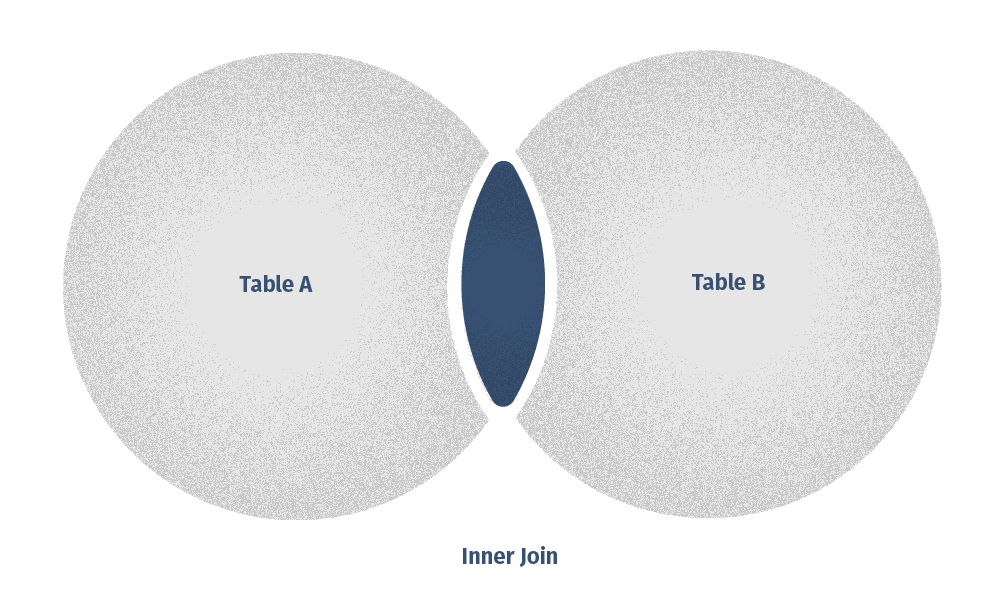
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL LEFT OUTER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; LEFT OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

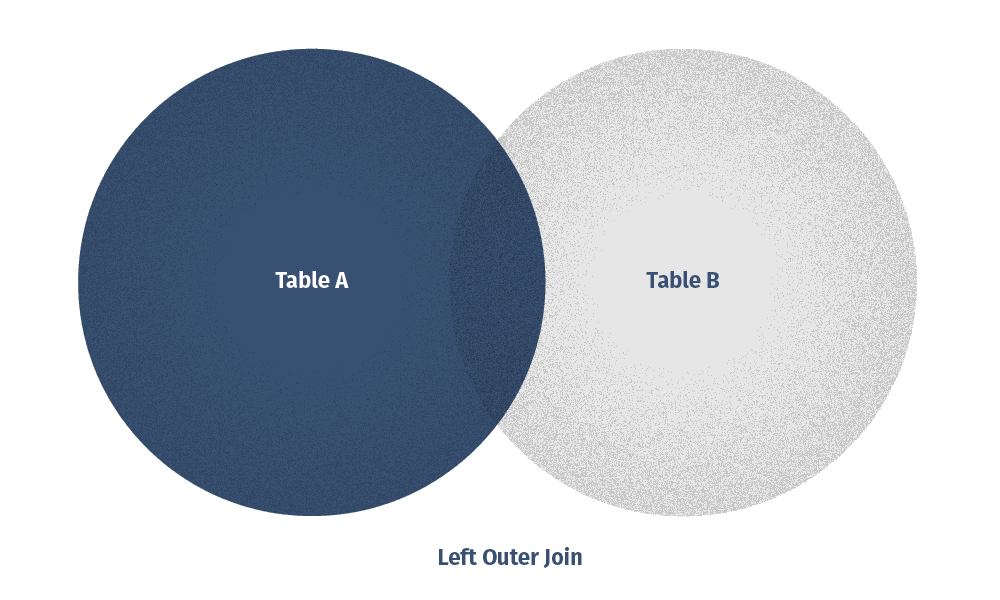
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL LEFT OUTER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; RIGHT OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

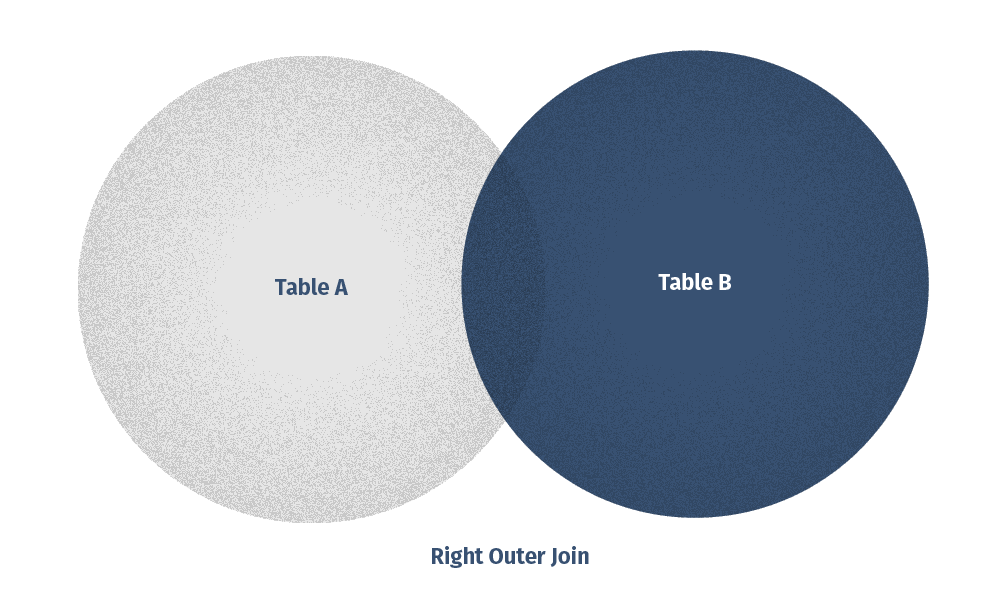
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL LEFT OUTER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; FULL OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

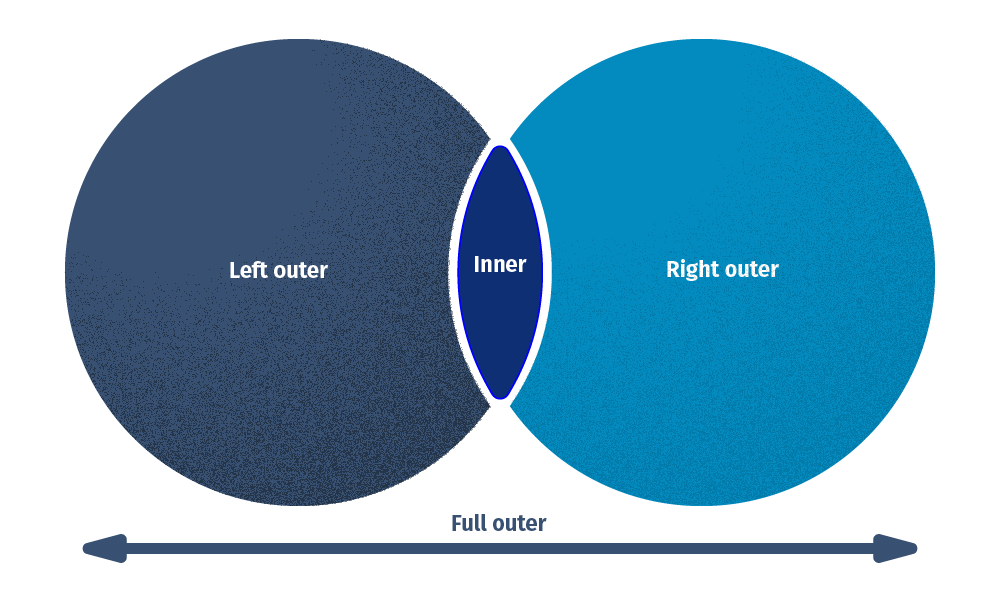
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL SELF JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; &lt;T1&gt; JOIN &lt;TableA&gt; &lt;T2&gt; ON &lt;T1&gt;.&lt;column_x&gt; = &lt;T2&gt;.&lt;column_y&gt;;</code>
<br>NOTE:: All columns will appear two times in result 
<br>NOTE:: Filter can be done using JOIN and WHERE <br>
<strong>Example</strong><br>
<code>SELECT a.*, b.employee_id AS manager_employee_id, b.FIRST_NAME AS manager_first_name, b.LAST_NAME AS manager_last_name FROM hr.employees a JOIN hr.employees b ON a.manager_id = b.employee_id </code>

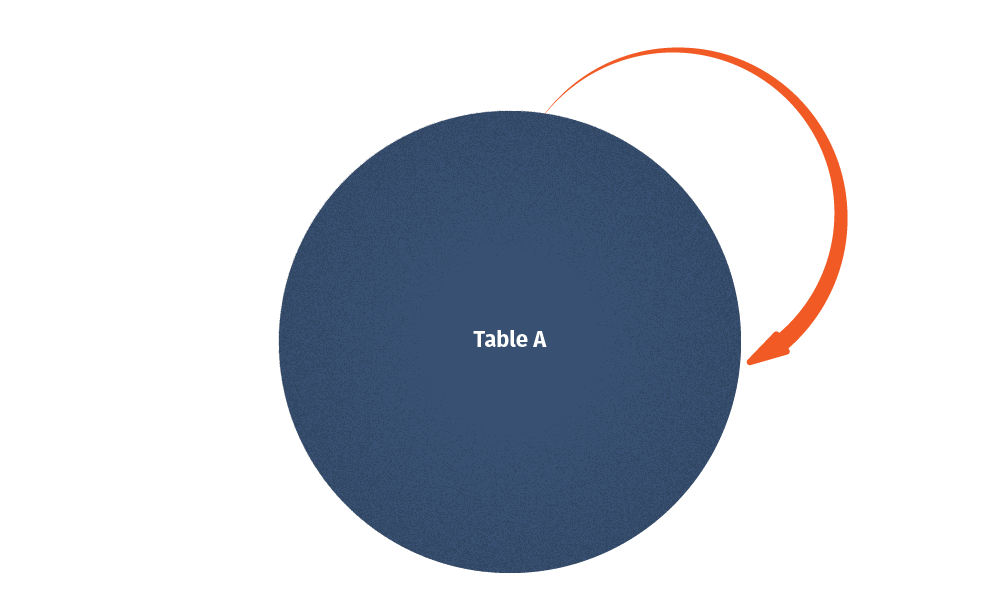
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL CROSS JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; FULL OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result


<strong>Example</strong><br>
<code>SELECT a.TEAM_NAME AS TEAM_A, b.TEAM_NAME AS TEAM_B FROM all_teams a CROSS JOIN all_teams b WHERE a.TEAM_ID < b.TEAM_ID </code>


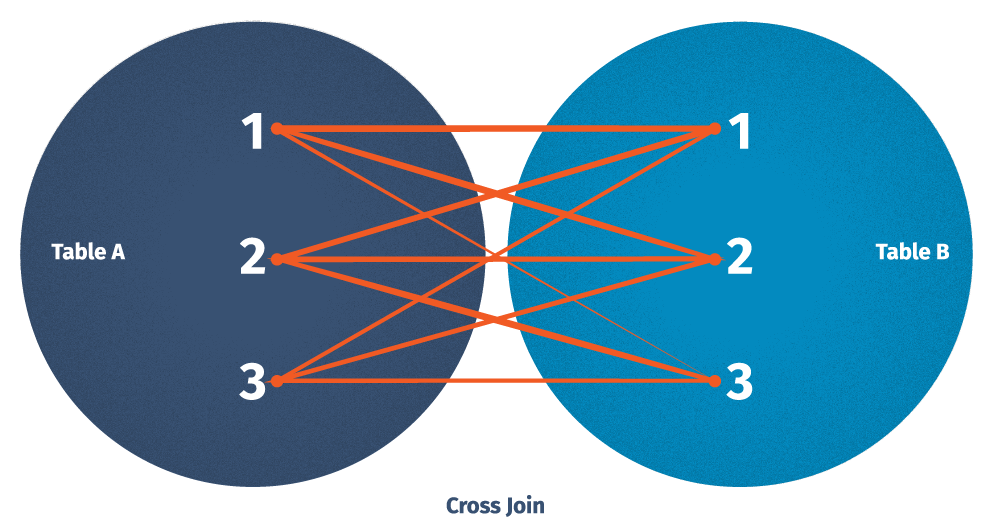
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<h2>5. UNION vs UNION ALL</h2>

<strong>UNION</strong><br>
<code>SELECT N-Columns FROM &lt;TableA&gt; UNION SELECT N-Columns FROM &lt;TableB&gt;;</code><br>
<strong>UNION ALL</strong><br>
<code>SELECT N-Columns FROM &lt;TableA&gt; UNION ALL SELECT N-Columns FROM &lt;TableB&gt;;</code><br>

<strong>Rules:</strong><br>
<ul>
<li>Same number of columns in each table</li>
<li>Columns should have <strong>same name (Sometimes)</strong>, <strong>same order</strong> and should contain <strong>related datatypes</strong> </li>
<li>For satisfying above rules, we can use following syntex:<br> <code>SELECT n-Columns, <strong>NULL AS</strong> &lt;Uncommon_column_1&gt;, <strong>NULL AS</strong> &lt;Uncommon_column_2&gt;,...</li>
<li><strong>UNION vs UNION ALL:</strong></li>
    <ul>
        <li><strong>UNION</strong> doesnot displays duplicate rows while <strong>UNION ALL</strong> displays duplicate rows.</li>
        <li><strong>UNION</strong> uses more SQL resources (computational power and storage space) as compared to <strong>UNION ALL</strong>.</li>
    </ul>
<li><strong>UNION vs UNION ALL:</strong></li><br>    
    <code>SELECT e.emp_no, e.first_name, e.last_name, NULL AS dept_no, NULL AS from_date FROM employees e WHERE last_name = 'Denis' UNION SELECT NULL AS emp_no, NULL AS first_name, NULL AS last_name, dm.dept_no, dm.from_date FROM dept_manager dm</code>
<li>SELECT * FROM () as a ORDER BY -a.emp_no DESC;</li>
</ul>

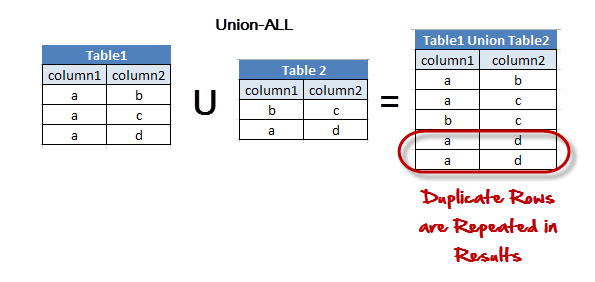
<h6><a href="https://www.guru99.com/unions.html" rel="noreferrer">[SOURCE]</a></h6>

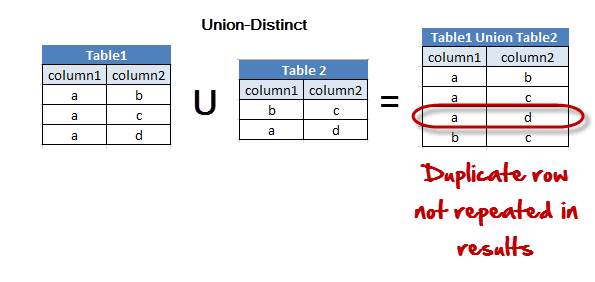
<h6><a href="https://www.guru99.com/unions.html" rel="noreferrer">[SOURCE]</a></h6>

Sometimes UNION DISTINCT is used instead of just UNION. UNION DISTINCT is used in scenarios when we need unique based on the where conditions in the query.


<h2>6. COALESCE, IFNULL|NVL, NULLIF, NVL2 </h2>

<strong>Syntex:</strong><br>
<ul>
    <li><code>IFNULL/NVL(expression_1,expression_2)</code>: If &lt;expression_1&gt; is null, it will return &lt;expression_2&gt; </li>
    <li><code>NVL2(expression_1,expression_2,expression_3)</code>: If &lt;expression_1&gt; is null, it will return &lt;expression_3&gt; else it will return &lt;expression_2&gt;</li>
    <li><code>NULLIF(expression_1,expression_2)</code>: If &lt;expression_1&gt; and &lt;expression_2&gt; are same, it will return NULL, else it will return &lt;expression_1&gt;. NOTE: &lt;expression_1&gt; cannot be the keyword 'NULL'.</li>
    <li><code>COALESCE(expression_1,expression_2,....expression_N) </code>: If &lt;expression_1&gt; is null, it will return &lt;expression_2&gt;, if &lt;expression_2&gt; is NULL then it will return &lt;expression_3&gt; and so on. NOTE: if all expression are NULL, it will return NULL.</li>
</ul>

<strong>Example:</strong><br>  
<code>SELECT MANAGER_ID, NVL(MANAGER_ID,0), NVL2(MANAGER_ID,1,0), COALESCE(MANAGER_ID,0), NULLIF(MANAGER_ID,102) FROM hr.employees</code>

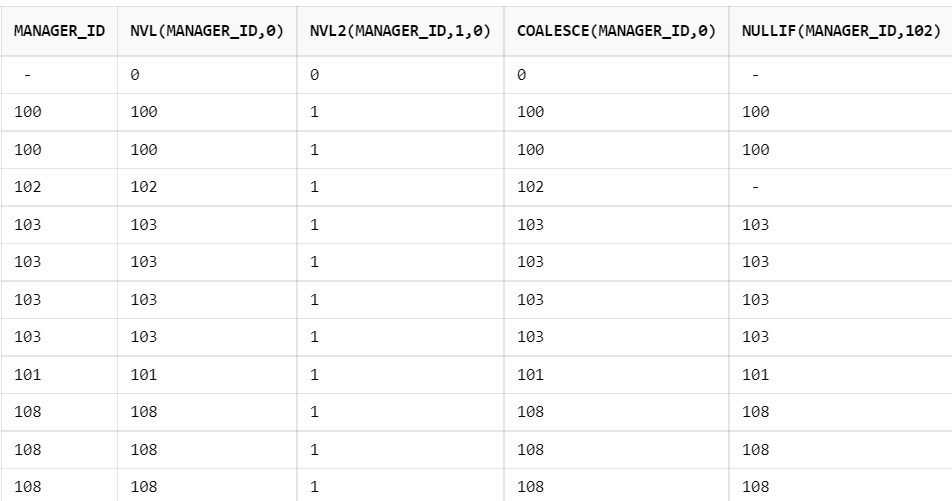

<h2>7. Subqueries: <code>IN</code>, <code>EXISTS</code>, and inline views</h2>

<h2>8. Subqueries: Correlated</h2>

<h2>9. <code>WITH</code> syntax: Subquery Factoring/CTE</h2>

<h2>10. SQL VIEWS </h2>

<ul>
    <li><strong>SQL <code>VIEW</code>:</strong> Virtual tables whoes content are obtained from an existing table (base table)</li>
    <li> The view created <strong>doesnot</strong> contain any real data so it occupies no extra memory; the data is physically stored in the base table.</li>
    <li> Acts as a <strong>dynamic</strong> table, as changes to base table are instantly reflected.</li>
    <li> Primary use is to <strong>reduce coding time </strong></li>
</ul>

<strong>Syntex:</strong><br>  
<code>CREATE OR REPLACE VIEW &lt;view_name&gt; AS SELECT &lt;col1&gt;,&lt;col2&gt;,&lt;col3&gt;...&lt;coln&gt; FROM &lt;TableA&gt;;</code>

<strong>Example:</strong><br>  
<ul>
    <li><strong>Creating <code>VIEW</code>:</strong> <code>CREATE OR REPLACE VIEW employee_service_duration AS SELECT employee_id, MIN(join_data) AS join_data, MAX(termination_date) AS termination_date FROM hr.employees GROUP BY employee_id;</code></li>
    <li> <strong>Accessing <code>VIEW</code>:</strong> <code>SELECT * FROM db_name.employee_service_duration;</code></li>
</ul>

<h2>11. Misc </h2>

 EXTRACT(DATE FROM a.creation_date) and DATE( a.creation_date) is same.

<h1>Advanced Topics</h1>

<h2>1. Stored routines</h2>

<strong>Stored routine:</strong> Set of SQL statements that can be stored on the database server.<br>

<ul>
<li>Whenever user need to run the routine, they can <code> CALL </code>, <code>REFERENCE</code> or <code>INVOKE</code> the routine.</li>
<li>Stored routines are of two types:</li>
    <ol>
        <li>Functions</li>
            <ul>
                <li>User defined functions</li>
                <li>In-build functions {Aggregate functions, datetime functions, ...}</li>
            </ul>
        <li>Procedures</li>
    </ol>
</ul>

<strong>Routines vs View:</strong><br>
<ul>
<li>A stored procedure uses parameters to do a function... whether it is updating and inserting data, or returning single values or data sets.</li>
<li>A view represents a <strong>virtual</strong> table.  You can join multiple tables in a view and use the view to present the data as if the data were coming from a single table.</li>
</ul>

<div class="s-prose js-post-body" itemprop="text">
<p><strong>A Stored Procedure:</strong> </p>

<ul>
<li>Accepts parameters </li>
<li>Can <strong>NOT</strong> be used as building block in a larger query </li>
<li>Can contain several statements, loops, IF ELSE, etc. </li>
<li>Can perform modifications to one or several tables </li>
<li>Can NOT be used as the target of an INSERT, UPDATE or DELETE 
statement. </li>
</ul>

<p><strong>A View:</strong> </p>

<ul>
<li>Does <strong>NOT</strong> accept parameters </li>
<li>Can be used as building block in a larger query </li>
<li>Can contain only one single SELECT query </li>
<li>Can <strong>NOT</strong> perform modifications to any table </li>
<li>But can (sometimes) be used as the target of an INSERT, UPDATE or 
DELETE statement. </li>
</ul>
</div>
    
<h6><a href="https://stackoverflow.com/questions/5194995/what-is-the-difference-between-a-stored-procedure-and-a-view" rel="noreferrer">[SOURCE]</a></h6>

<strong>Syntex:</strong><br>  
<code>

USE &lt;db_name&gt;;<br>
DELIMITER &dollar; &dollar;<br>
CREATE PRODECURE &lt;procedure_name&gt;()<br>
BEGIN<br>
    &lt;query_1&gt;;<br>
    &lt;query_2&gt;;<br>
    &lt;query_3&gt;;<br>
    ..........<br>
    &lt;query_n&gt;;<br>
END&dollar;&dollar;<br>
DELIMITER ;<br>
</code>

# SELECT

In [1]:
SELECT * FROM emp; 

SyntaxError: invalid syntax (<ipython-input-1-7daa3b746c5d>, line 1)

# Analytical Function or Window Function

https://www.kaggle.com/code/alexisbcook/analytic-functions 

Aggregate functions perform calculations based on sets of rows. Analytic functions operate on a set of rows as well however, unlike aggregate functions, analytic functions return a (potentially different) value for each row in the original table. Analytic functions allow us to perform complex calculations with relatively straightforward syntax. For instance, we can quickly calculate moving averages and running totals, among other quantities.

<p>All analytic functions have an <strong>OVER</strong> clause, which defines the sets of rows used in each calculation.  The <strong>OVER</strong> clause has three (optional) parts:</p>
<ul>
<li>The <strong>PARTITION BY</strong> clause divides the rows of the table into different groups.  In the query below, we divide by <code>RACER_ID</code> so that the calculations are separated by runner.</li>
<li>The <strong>ORDER BY</strong> clause defines an ordering within each partition.  In the sample query, ordering by the <code>date</code> column ensures that earlier training sessions appear first.</li>
<li>The final clause (<code>ROWS BETWEEN 1 PRECEDING AND CURRENT ROW</code>) is known as a <strong>window frame</strong> clause.  It identifies the set of rows used in each calculation.  We can refer to this group of rows as a <strong>window</strong>.  (<em>Actually, analytic functions are sometimes referred to as <strong>analytic window functions</strong> or simply <strong>window functions</strong>!</em>)  </li>
</ul>

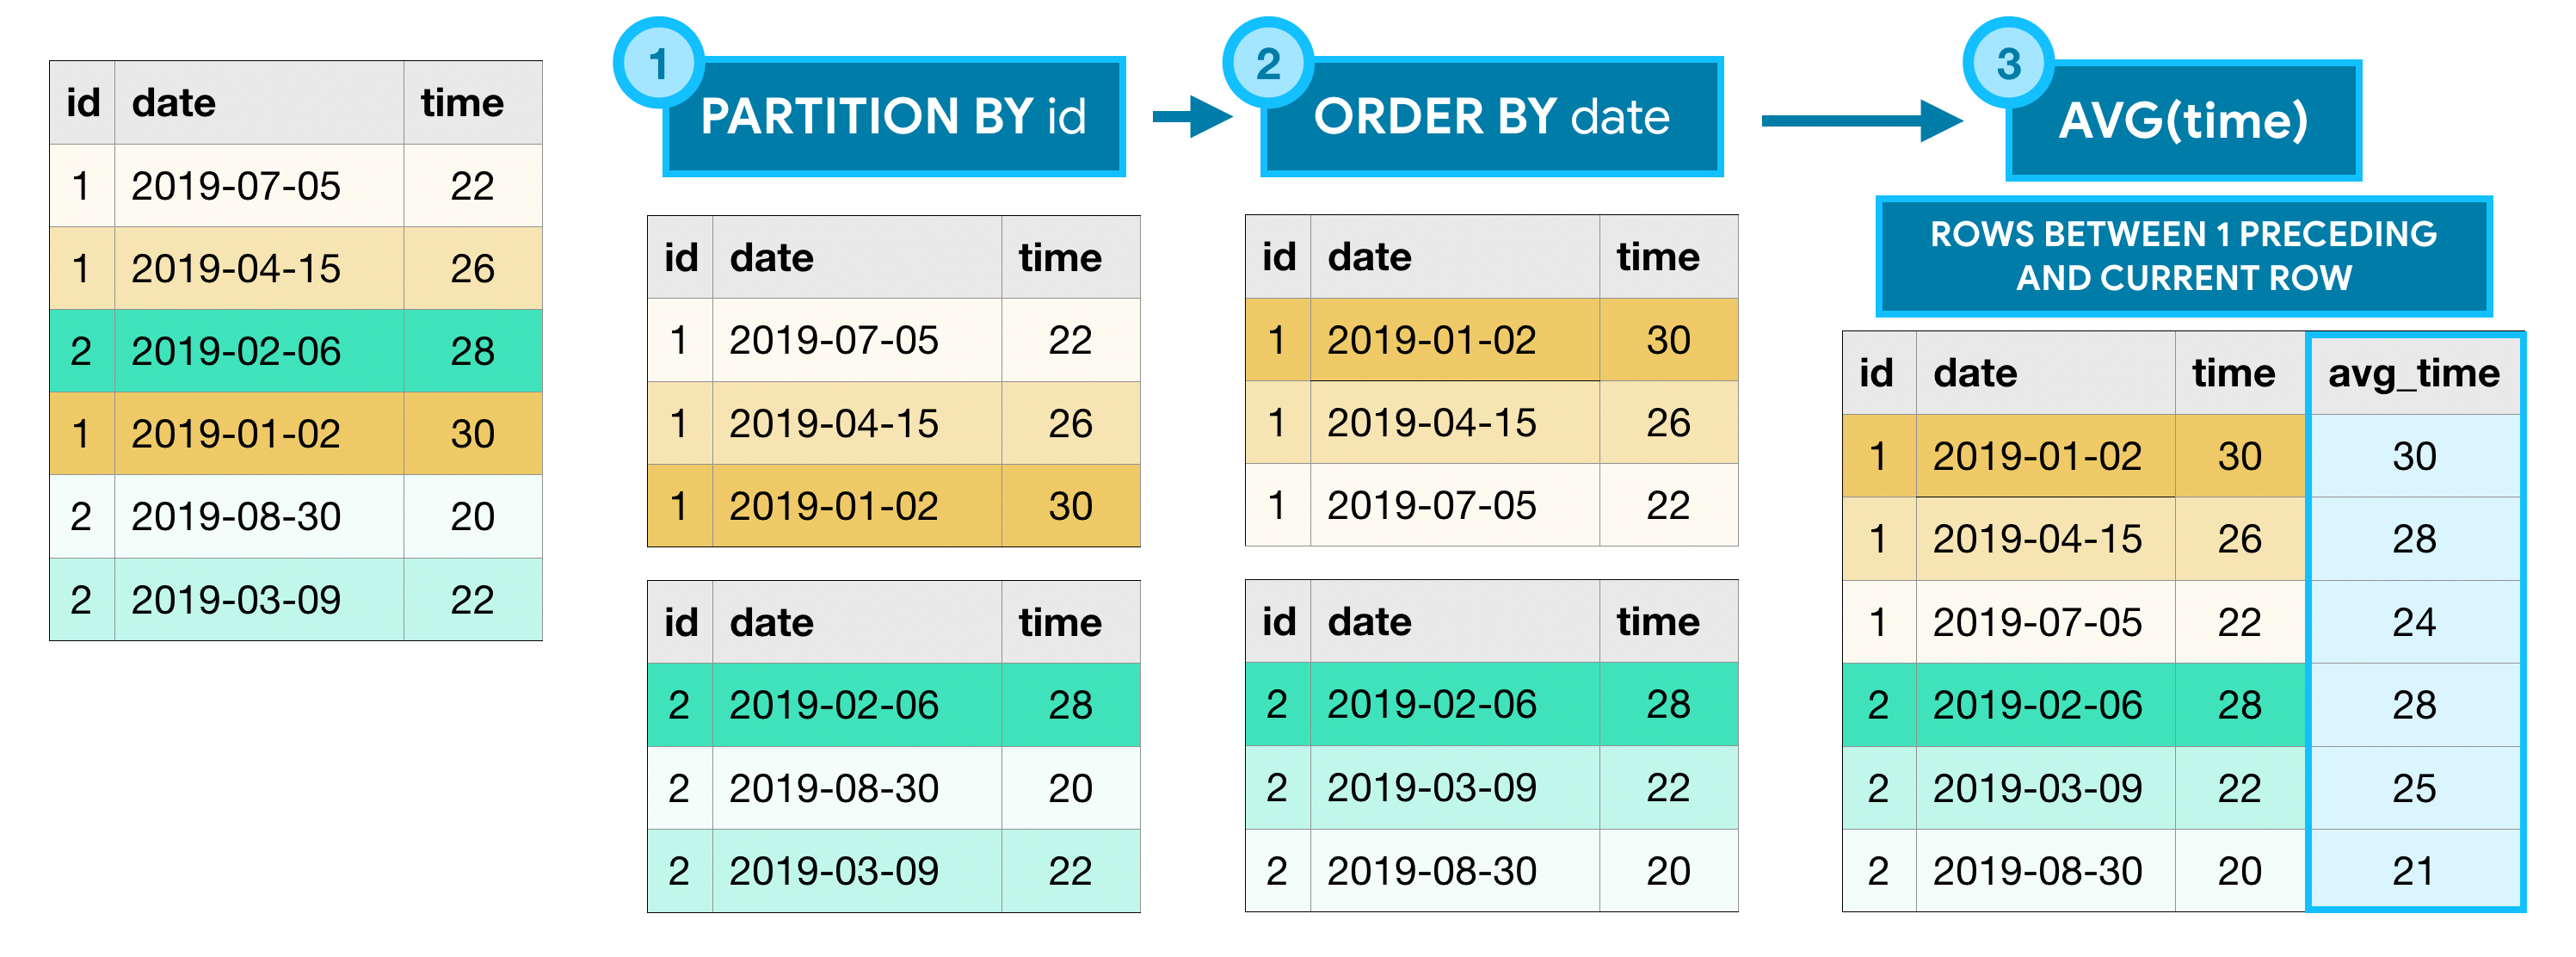

<p>There are many ways to write window frame clauses:</p>
<ul>
<li><code>ROWS BETWEEN 1 PRECEDING AND CURRENT ROW</code> - the previous row and the current row.</li>
<li><code>ROWS BETWEEN 3 PRECEDING AND 1 FOLLOWING</code> - the 3 previous rows, the current row, and the following row.  </li>
<li><code>ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING</code> - all rows in the partition.</li>
<li>...</li>
</ul>

<h1 id="Three-types-of-analytic-functions" tabindex="0">Three types of analytic functions<a class="anchor-link" href="https://www.kaggle.com/code/alexisbcook/analytic-functions#Three-types-of-analytic-functions" target="_self" rel=" noreferrer nofollow">¶</a></h1>
<p>The example above uses only one of many analytic functions.  BigQuery supports a wide variety of analytic functions, and we'll explore a few here. For a complete listing, you can take a look at the <a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/analytic-function-concepts" rel=" noreferrer nofollow">documentation</a>.</p>

<h3 id="1)-Analytic-aggregate-functions" tabindex="0">1) Analytic aggregate functions<a class="anchor-link" href="https://www.kaggle.com/code/alexisbcook/analytic-functions#1)-Analytic-aggregate-functions" target="_self" rel=" noreferrer nofollow">¶</a></h3>
<p>As you might recall, <strong>AVG()</strong> (from the example above) is an aggregate function.  The <strong>OVER</strong> clause is what ensures that it's treated as an analytic (aggregate) function.  <strong>Aggregate functions</strong> take all of the values within the window as input and return a single value.</p>
<ul>    
<li><strong>MIN()</strong> (or <strong>MAX()</strong>) - Returns the minimum (or maximum) of input values</li>    
<li><strong>AVG()</strong> (or <strong>SUM()</strong>) - Returns the average (or sum) of input values </li    >
<li><strong>COUNT()</strong> - Returns the number of rows in the in put</
li>
<ul>ul>/ul>

SELECT EMP_ID, DEPT_ID,EXPERTISE,SALARY,  
  
SUM(SALARY) OVER (PARTITION BY DEPT_ID) AS DEPT_SALARY,  
  
SUM(SALARY) OVER (PARTITION BY EXPERTISE) AS EXPERTISE_SALARY,  

AVG(LAP_TIME) OVER (PARTITION BY RACER_ID ORDER BY DATE <strong>ROWS BETWEEN 1 PRECEDING AND CURRENT ROW</strong>) as moving_averages,

AVG(num_trips) OVER (ORDER BY trip_date <strong>ROWS BETWEEN 3 PRECEDING AND 3 FOLLOWING</strong>)
  
FROM AB_EMPLOYEE  
  
ORDER BY DEPT_ID,SALARY DESC;

<h3 id="2)-Analytic-navigation-functions" tabindex="0">2) Analytic navigation functions<a class="anchor-link" href="https://www.kaggle.com/code/alexisbcook/analytic-functions#2)-Analytic-navigation-functions" target="_self" rel=" noreferrer nofollow">¶</a></h3>
<p><strong>Navigation functions</strong> assign a value based on the value in a (usually) different row than the current row.</p>
<ul>
<li><strong>FIRST_VALUE()</strong> (or <strong>LAST_VALUE()</strong>) - Returns the first (or last) value in the input</li>
<li><strong>LEAD()</strong> (and <strong>LAG()</strong>) - Returns the value on a subsequent (or preceding) row</li>
</ul>

https://learnsql.com/blog/lead-and-lag-functions-in-sql/
### Using LAG() and LEAD() With a Specific Offset
SELECT year, quarter,
  LAG(bonus,4) OVER(ORDER BY year,quarter) AS previous_bonus,
 bonus AS current_bonus,
  LEAD(bonus,4) OVER(ORDER BY year,quarter) AS next_bonus
FROM employee
WHERE employee_id=1;
#### Using LAG() and LEAD() With a Default ValueSELECT product_id, month,
  LAG(count,1,0) OVER(ORDER BY month) AS previous_count,
  count AS current_count,
  count - LAG(count,1,0) OVER(ORDER BY month) AS difference
FROM sale_product
WHERE product_

### Using LAG() and LEAD() With PartitionsSELECT product_id, month,
  LAG(count,1,0) OVER(PARTITION BY product_id ORDER BY month) AS previous_count,
  count AS current_count,
  count - LAG(count,1,0) OVER(PARTITION BY product_id ORDER BY month) AS difference
FROM sale_product;
id=1;


SELECT EMP_ID, DEPT_ID,EXPERTISE,SALARY,  

LAG(sale_value) OVER(ORDER BY sale_value) as previous_sale_value,

LEAD(sale_value) OVER(ORDER BY sale_value) as next_sale_value
  
FROM AB_EMPLOYEE  
  
ORDER BY DEPT_ID,SALARY DESC;

SELECT DATEDIFF(year, '2017/08/25', '2011/08/25') AS DateDiff; -- Lead/Lag in the diff functions

TIMESTAMP_DIFF(start_timestamp,stop_timestamp, MINUTE) as prev_break  -- Lead/Lag in the diff functions

<h3 id="3)-Analytic-numbering-functions" tabindex="0">3) Analytic numbering functions<a class="anchor-link" href="https://www.kaggle.com/code/alexisbcook/analytic-functions#3)-Analytic-numbering-functions" target="_self" rel=" noreferrer nofollow">¶</a></h3>
<p><strong>Numbering functions</strong> assign integer values to each row based on the ordering.</p>
<ul>
<li><strong>ROW_NUMBER()</strong> - Returns the order in which rows appear in the input (starting with <code>1</code>)</li>
<li><strong>RANK()</strong> - All rows with the same value in the ordering column receive the same rank value, where the next row receives a rank value which increments by the number of rows with the previous rank value.</li>
<li><strong>DENSE_RANK()</strong></li>
</ul>

SELECT EMP_ID, DEPT_ID,EXPERTISE,SALARY,  
  
ROW_NUMBER() OVER (PARTITION BY DEPT_ID ORDER BY SALARY DESC ) AS ROW_NUM ,  
  
RANK() OVER (PARTITION BY DEPT_ID ORDER BY SALARY DESC ) AS RANK_NUM,  
  
DENSE_RANK() OVER (PARTITION BY DEPT_ID ORDER BY SALARY DESC ) AS D_RANK_NUMalue


  
FROM AB_EMPLOYEE  
  
ORDER BY DEPT_ID,SALARY DE;SC

source: https://livesql.oracle.com/apex/livesql/file/content_FHXEW8QV9BNS5LUN2GTMYWWFL.html

<div class="s-Session-result"><span class="s-Session-msg"><table summary="SQL Query Results" class="u-Report">
<tbody><tr><th id="EMP_ID">EMP_ID</th><th id="DEPT_ID">DEPT_ID</th><th id="EXPERTISE">EXPERTISE</th><th id="SALARY">SALARY</th><th id="DEPT_SALARY">DEPT_SALARY</th><th id="EXPERTISE_SALARY">EXPERTISE_SALARY</th><th id="ROW_NUM">ROW_NUM</th><th id="RANK_NUM">RANK_NUM</th><th id="D_RANK_NUM">D_RANK_NUM</th></tr><tr><td headers="EMP_ID">5003</td><td headers="DEPT_ID">1</td><td headers="EXPERTISE">SCIENCE</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">50000</td><td headers="ROW_NUM">1</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">5003</td><td headers="DEPT_ID">1</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">2</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">5003</td><td headers="DEPT_ID">1</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">3</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">106</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">80000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">1</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">106</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">80000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">2</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">7003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">3</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">104</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">4</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">7003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">5</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">104</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">6</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">6003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">50556</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">7</td><td headers="RANK_NUM">7</td><td headers="D_RANK_NUM">3</td></tr><tr><td headers="EMP_ID">6003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">50556</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">8</td><td headers="RANK_NUM">7</td><td headers="D_RANK_NUM">3</td></tr><tr><td headers="EMP_ID">107</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">9</td><td headers="RANK_NUM">9</td><td headers="D_RANK_NUM">4</td></tr><tr><td headers="EMP_ID">107</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">10</td><td headers="RANK_NUM">9</td><td headers="D_RANK_NUM">4</td></tr><tr><td headers="EMP_ID">105</td><td headers="DEPT_ID">3</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">75000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">1</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">105</td><td headers="DEPT_ID">3</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">75000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">2</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr>
</tbody></table><br>15 rows selected.</span>
                                </div>

# SQL – ROWS BETWEEN
https://www.geeksforgeeks.org/sql-rows-between/

ROWS BETWEEN is used to calculating the running measure / aggregation in Analytical Functions. Whenever you use window functions you specify the rows which shall be considered for calculating measures. If you don’t specify anything then by default all the rows in the partition participate in calculating measures.

Some common aggregation function SUM() , MIN(),MAX() , COUNT() , AVG() .

Note– if you don’t specify anything in over() clause for partitioning, then by default all rows in dataset consider as an single partition .

 RANGE must always be from start to end i.e. Start must be before End.

### Some Common Specifications

<ol>
<li value="1"><b><strong>UNBOUNDED PRECEDING</strong></b><span>: All rows before current row are considered.</span></li>
<li value="2"><b><strong>UNBOUNDED FOLLOWING</strong></b><span>: All rows after the current row are considered.</span></li>
<li value="3"><b><strong>CURRENT ROW</strong></b><span>: Range starts or ends at CURRENT ROW.</span></li>
</ol>

You can also specify NUMERICAL values in place of “UNBOUNDED” keyword in above mentioned specifications like 1 PRECEDING and 2 FOLLOWING. Default value is UNBOUNDED PRECEDING and UNBOUNDED FOLLOWING i.e. all rows are considered.

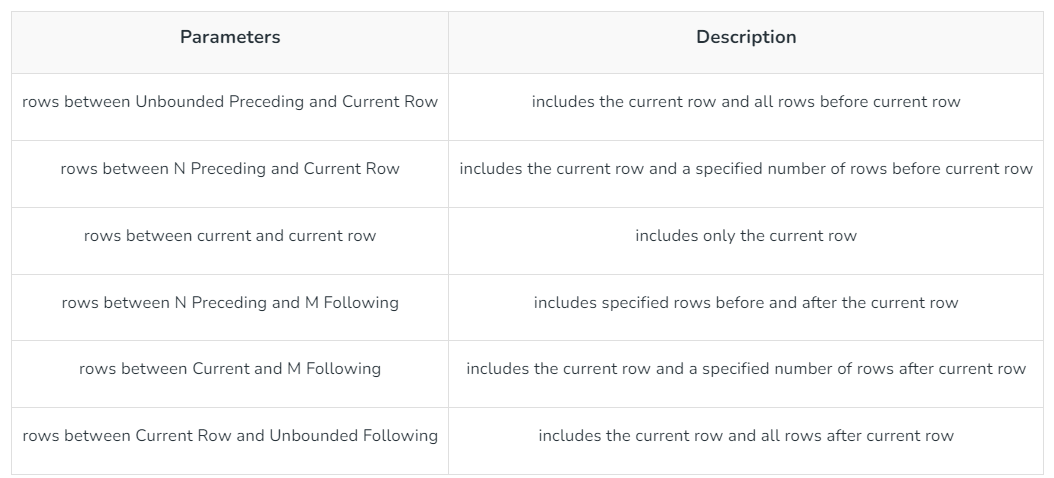

<code>SELECT column1, <strong>function_name (column2) OVER ( ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)</strong> FROM table_name .</code>

AVG(LAP_TIME) OVER (PARTITION BY RACER_ID ORDER BY DATE <strong>ROWS BETWEEN 1 PRECEDING AND CURRENT ROW</strong>) as moving_averages,

AVG(num_trips) OVER (ORDER BY trip_date <strong>ROWS BETWEEN 3 PRECEDING AND 3 FOLLOWING</strong>)

# Nested and Repeated Data
https://www.kaggle.com/code/alexisbcook/nested-and-repeated-data


### Nested data

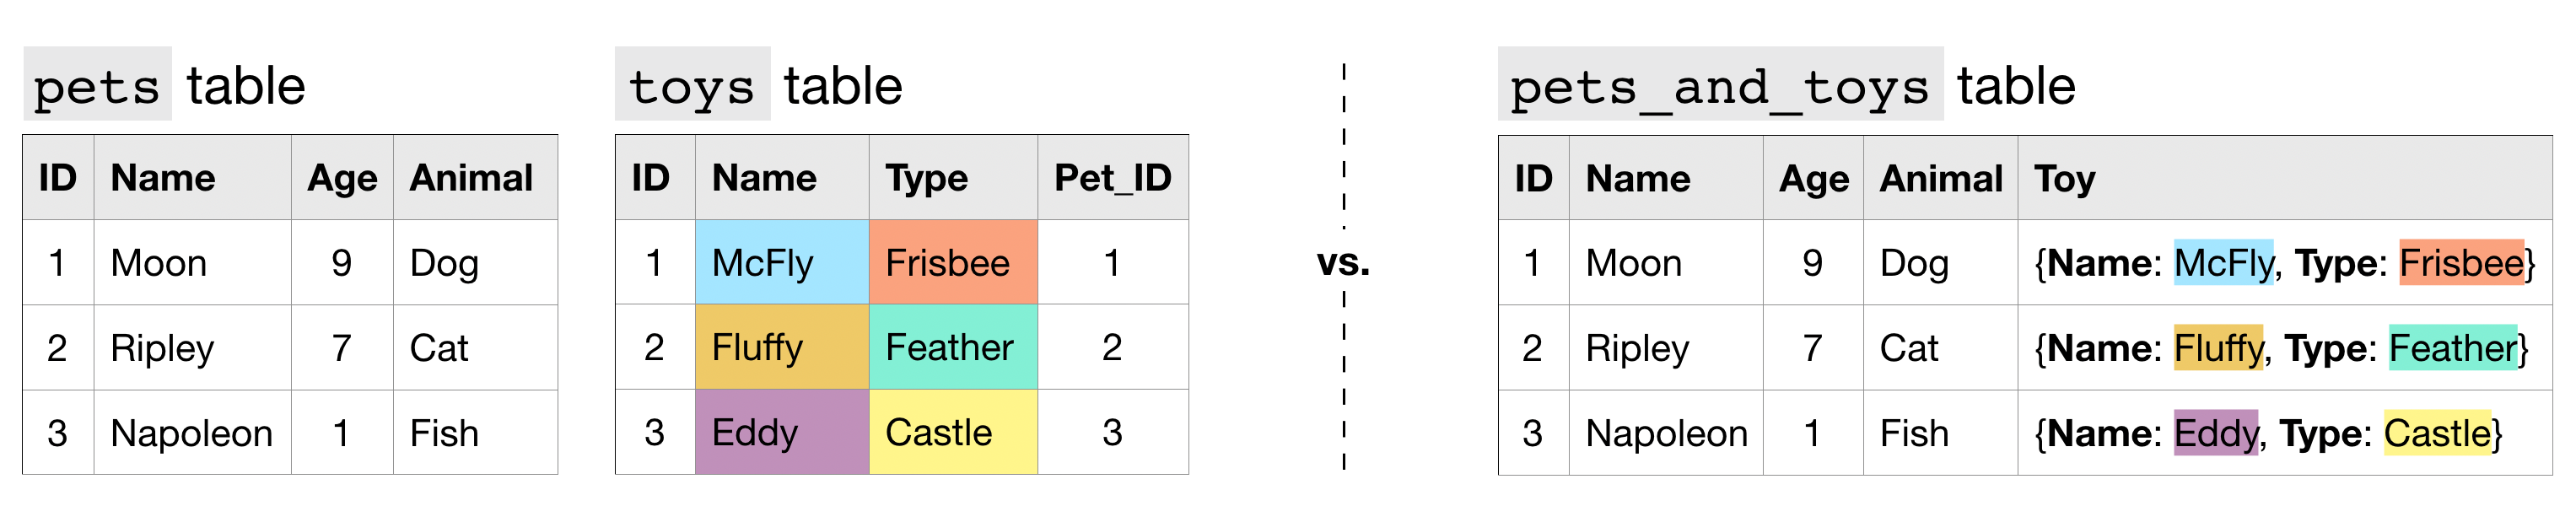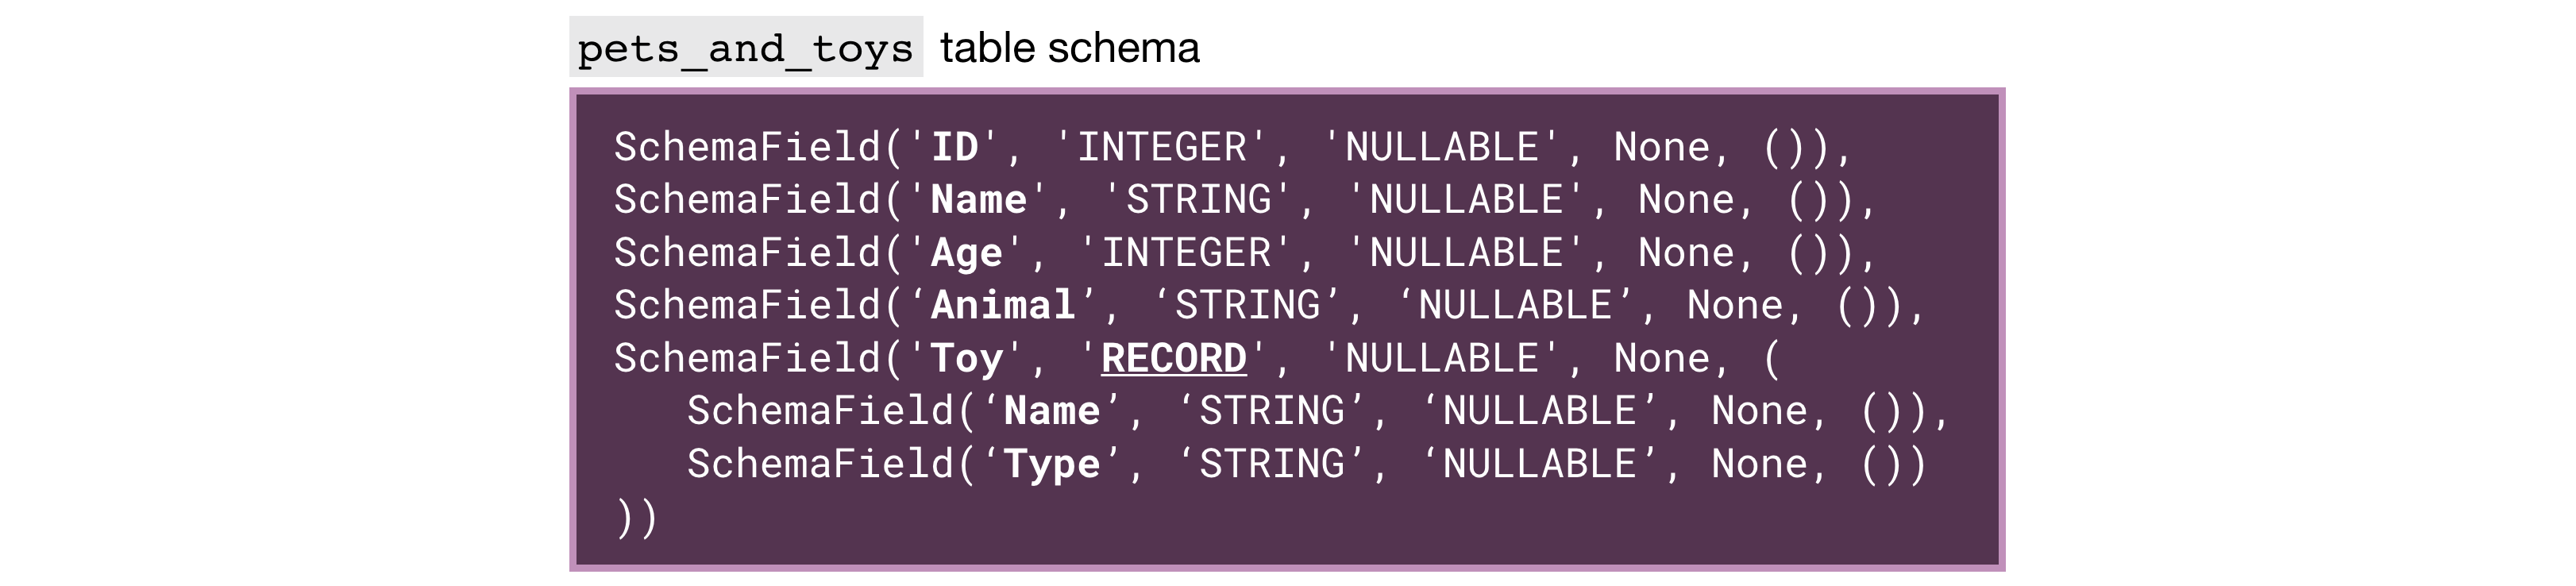

Nested columns have type <strong>STRUCT</strong> (or type <strong>RECORD</strong>). This is reflected in the table schema above. To query a column with nested data, use '.' (dot) operator as below:

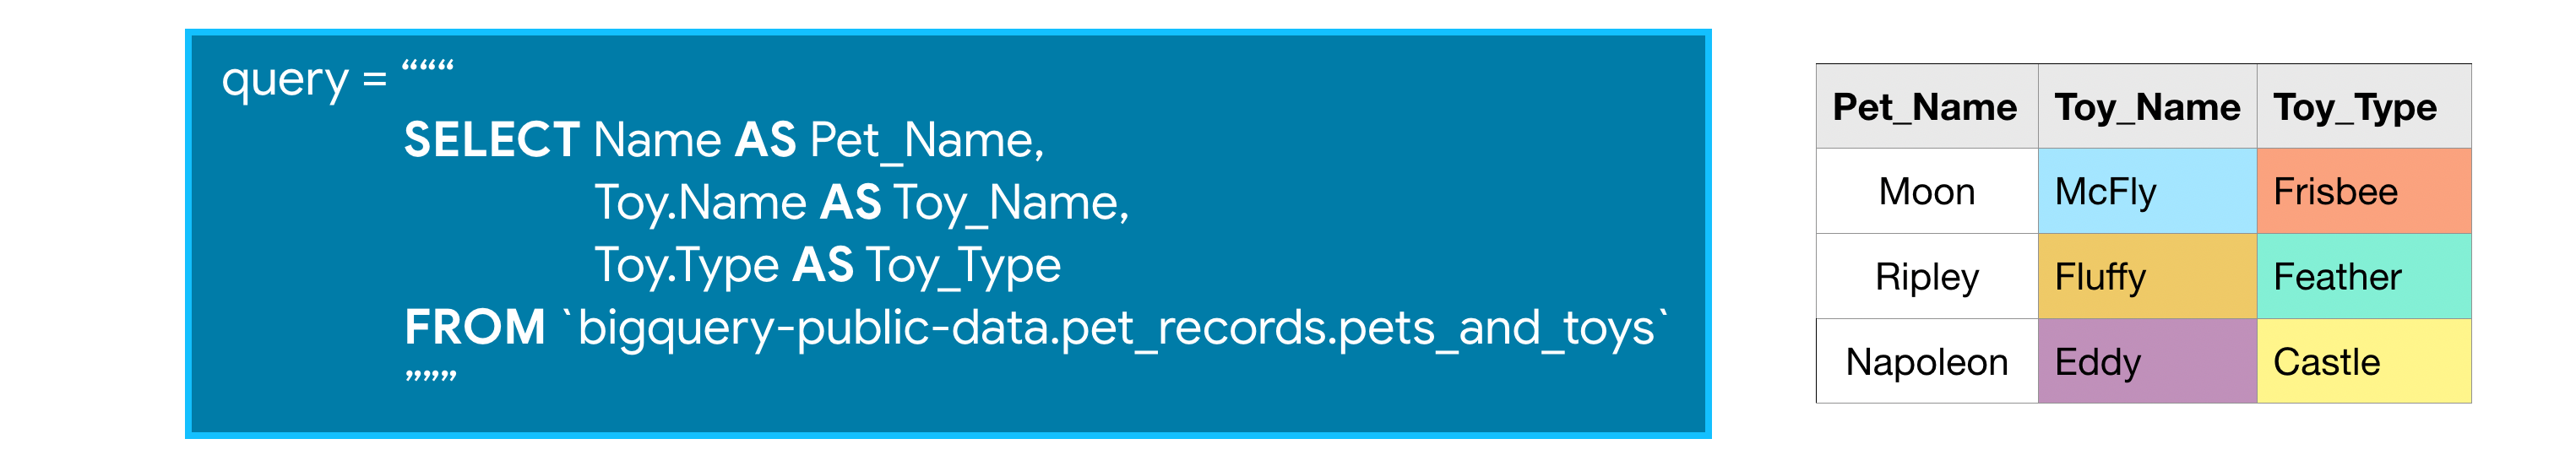


### Repeated data

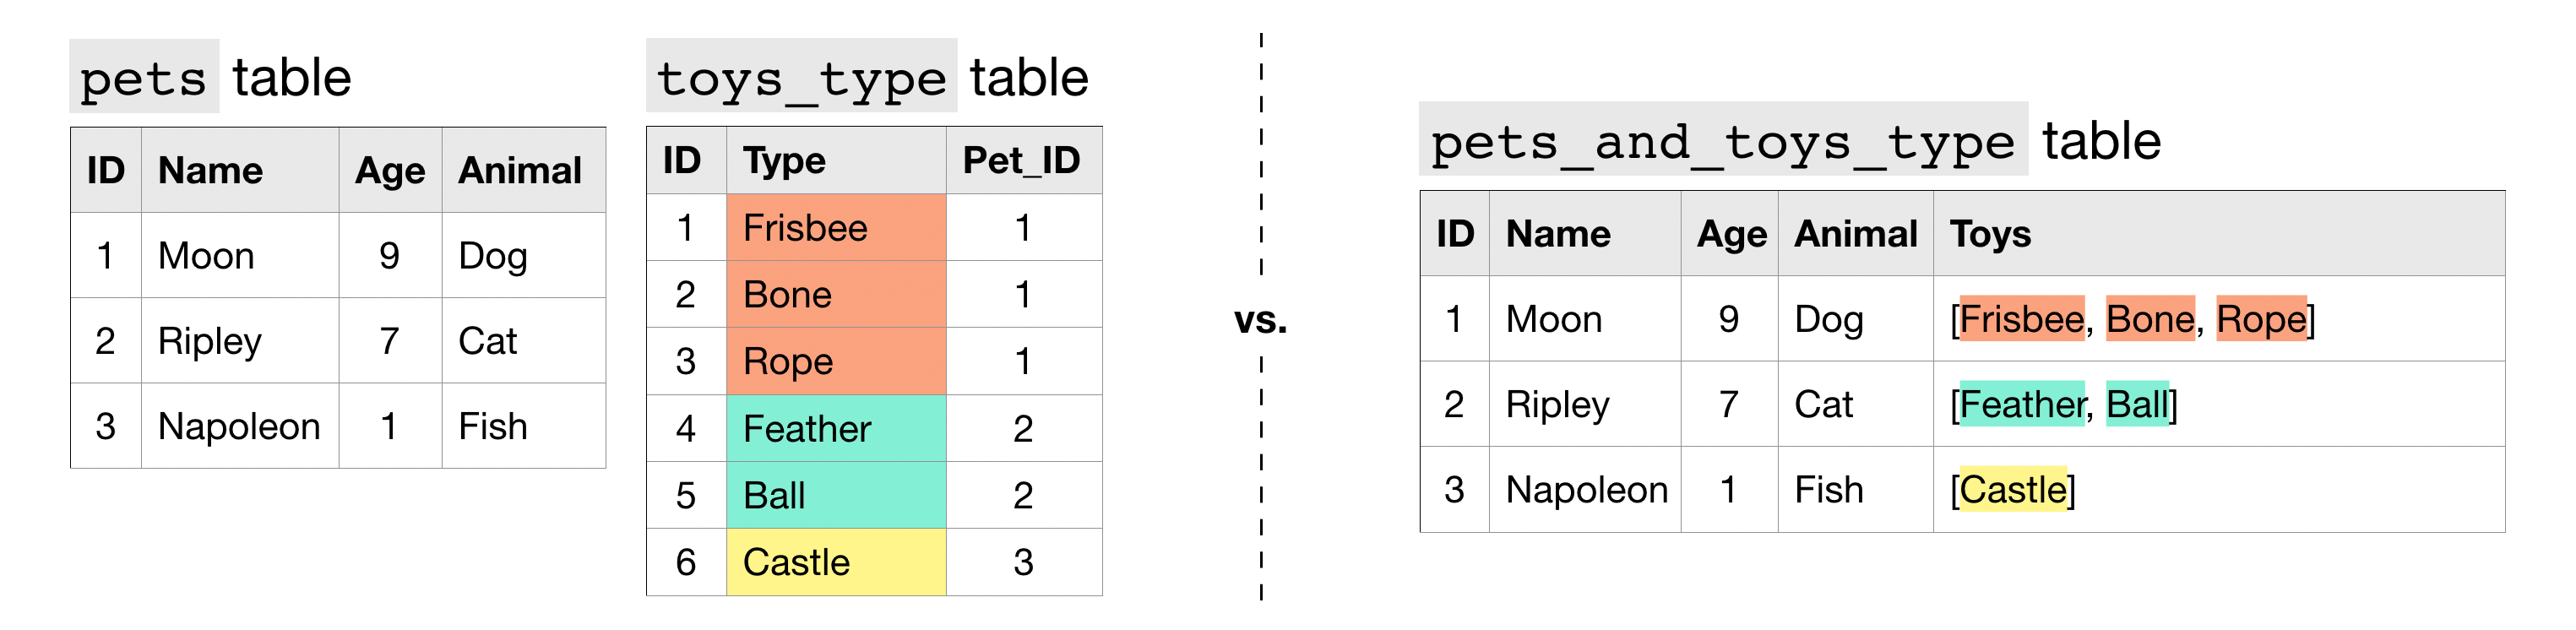

<p>We say that the "Toys" column contains <strong>repeated data</strong>, because it permits more than one value for each row.  This is reflected in the table schema below, where the mode of the "Toys" column appears as <strong>'REPEATED'</strong>.</p>

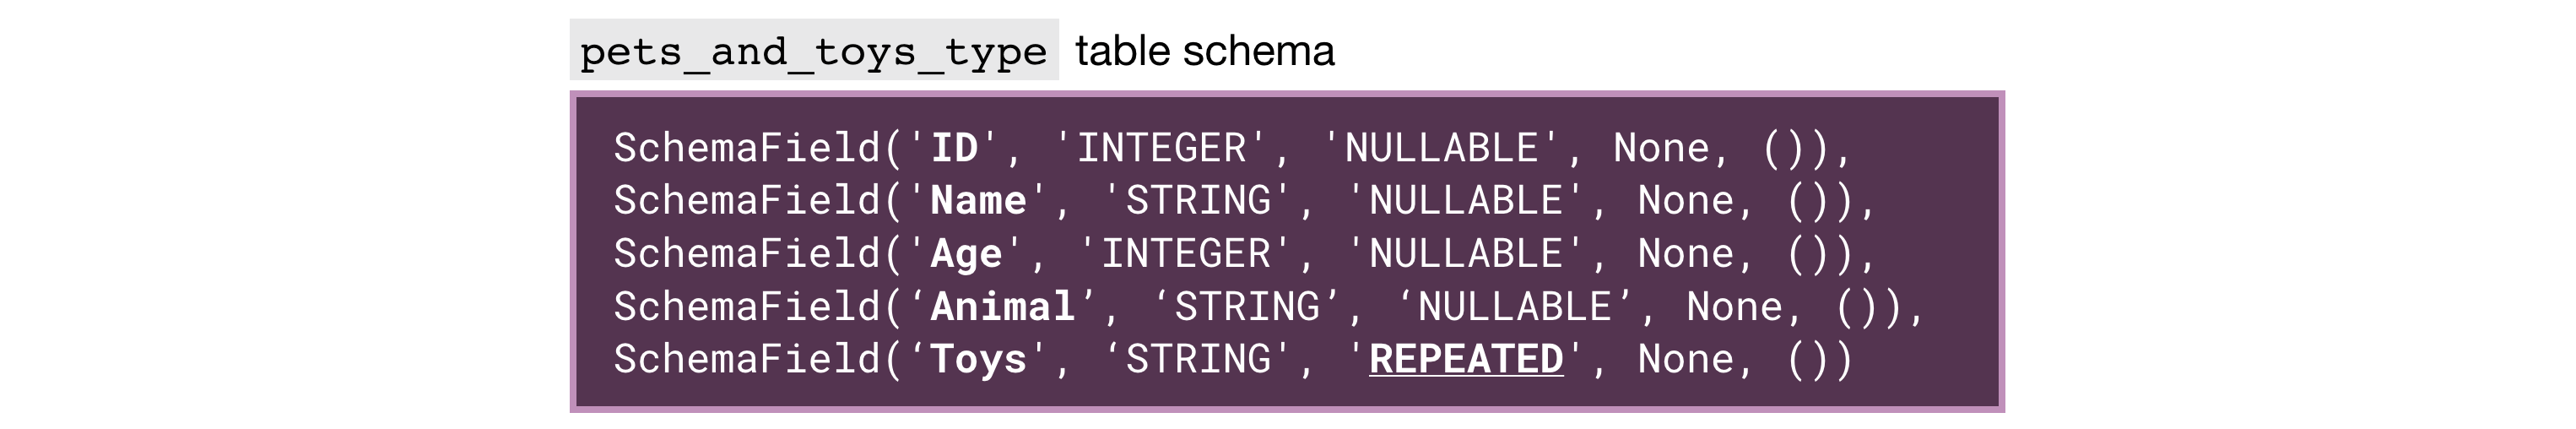

<p>Each entry in a repeated field is an <strong>ARRAY</strong>, or an ordered list of (zero or more) values with the same datatype.  For instance, the entry in the "Toys" column for Moon the Dog is <strong>[Frisbee, Bone, Rope]</strong>, which is an ARRAY with three values.</p>

<p>When querying repeated data, we need to put the name of the column containing the repeated data inside an <strong>UNNEST()</strong> function.</p>
<p>This essentially flattens the repeated data (which is then appended to the right side of the table) so that we have one element on each row.  For an illustration of this, check out the image below.</p>

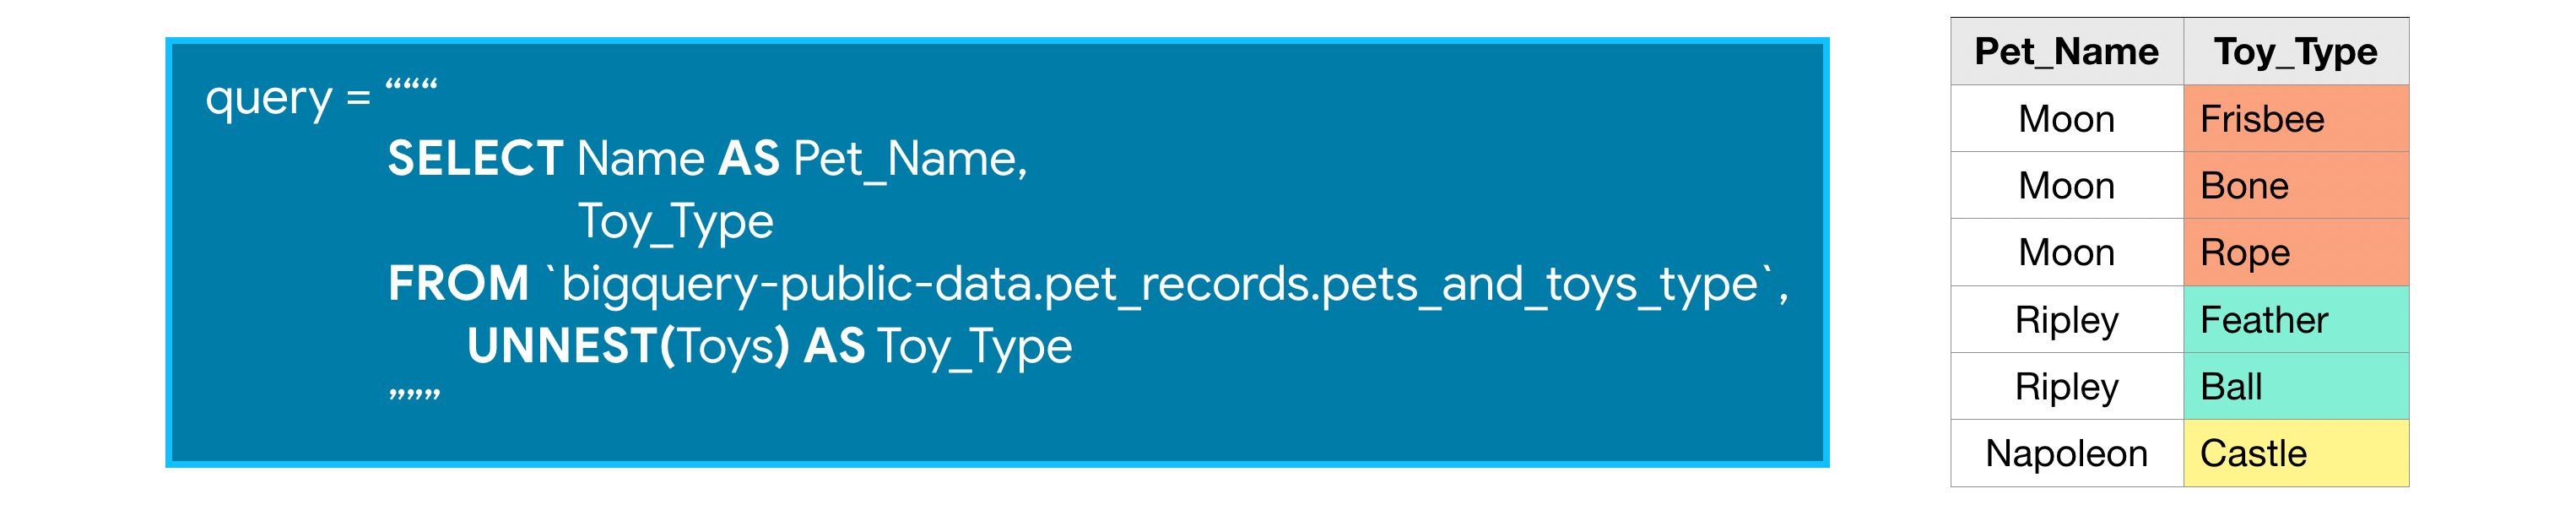

### Nested as well as Repeated Data

<p>Now, what if pets can have multiple toys, <em>and</em> we'd like to keep track of both the name and type of each toy?  In this case, we can make the "Toys" column both <strong>nested</strong> and <strong>repeated</strong>.</p>

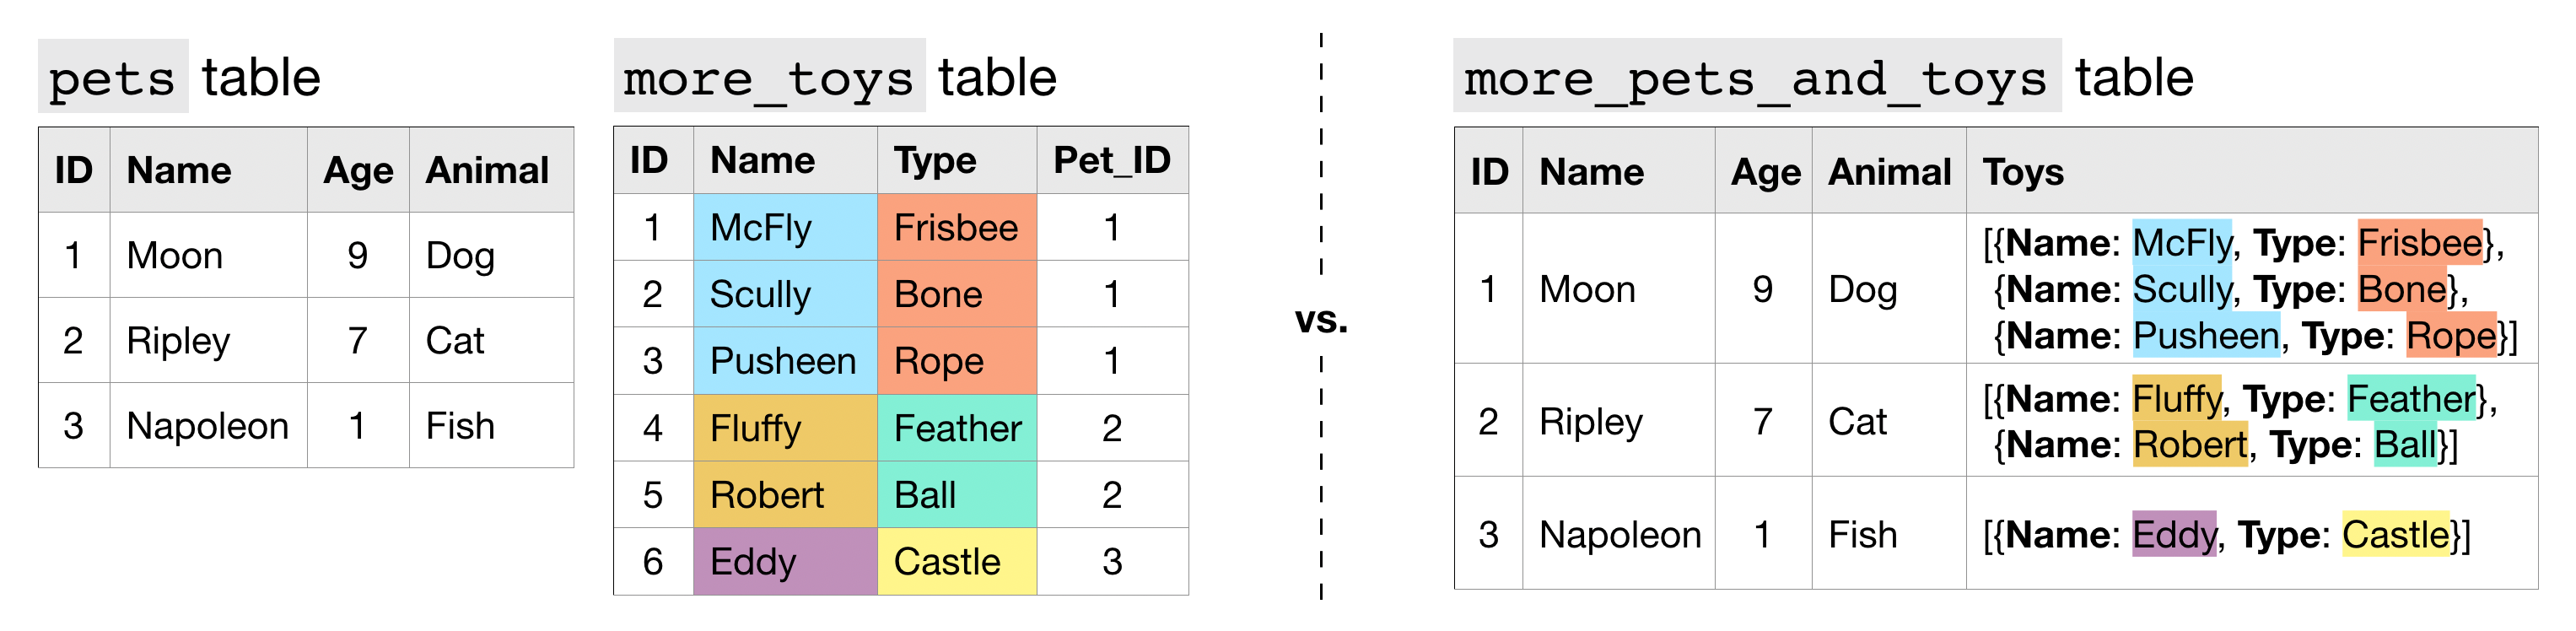

<p>In the <code>more_pets_and_toys</code> table above, "Name" and "Type" are both fields contained within the "Toys" STRUCT, and each entry in both "Toys.Name" and "Toys.Type" is an ARRAY.</p>

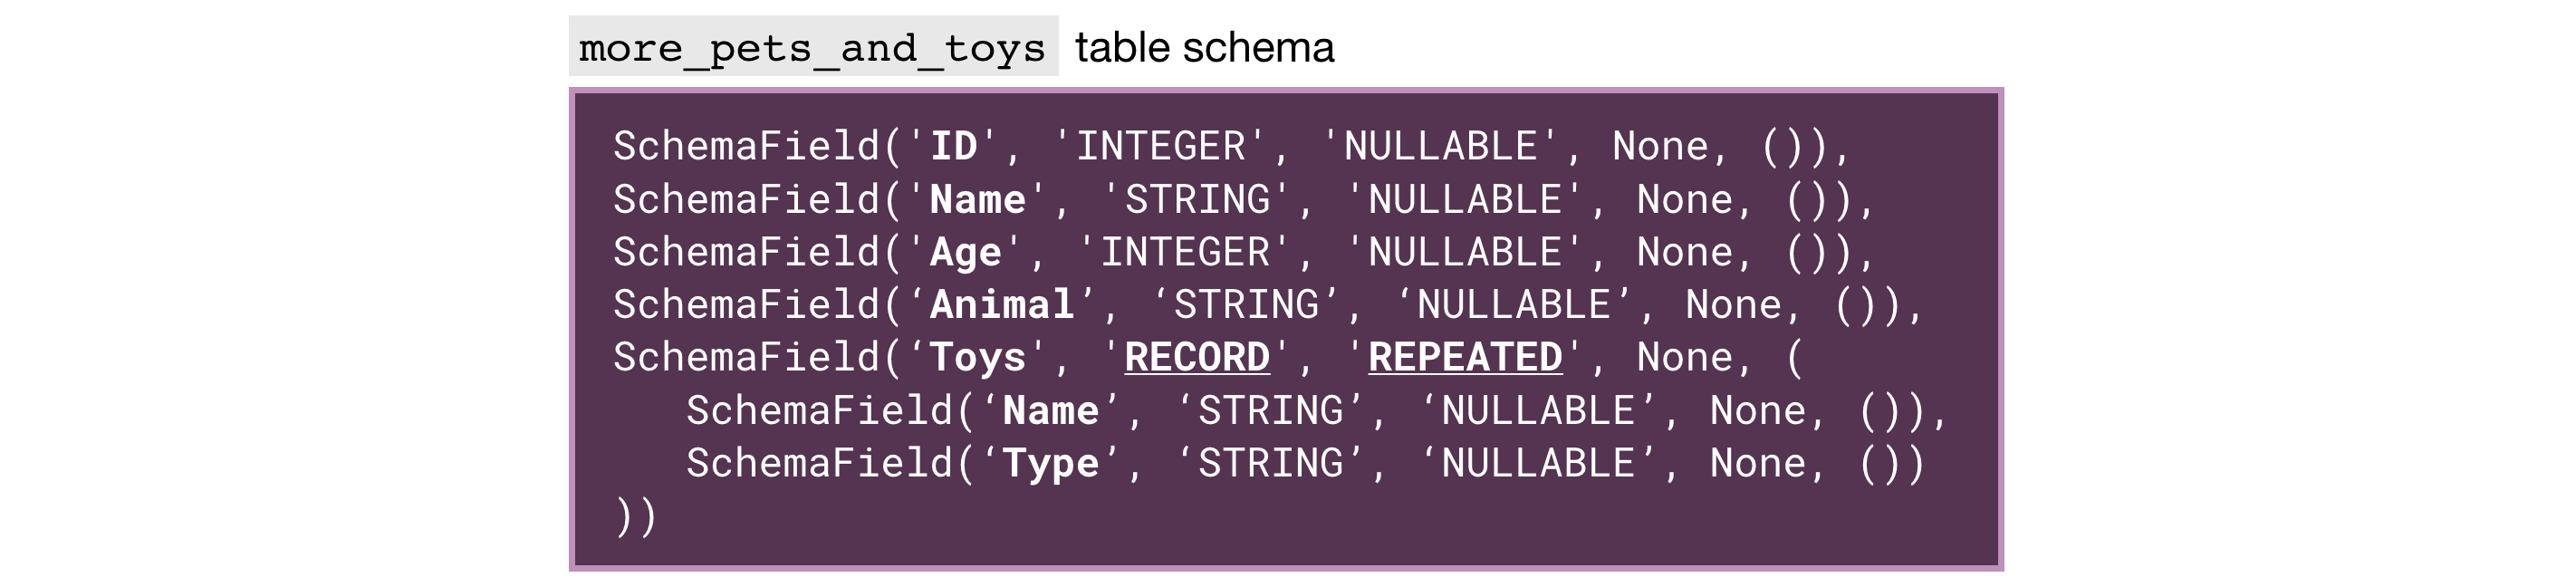

<p>Let's look at a sample query.</p>

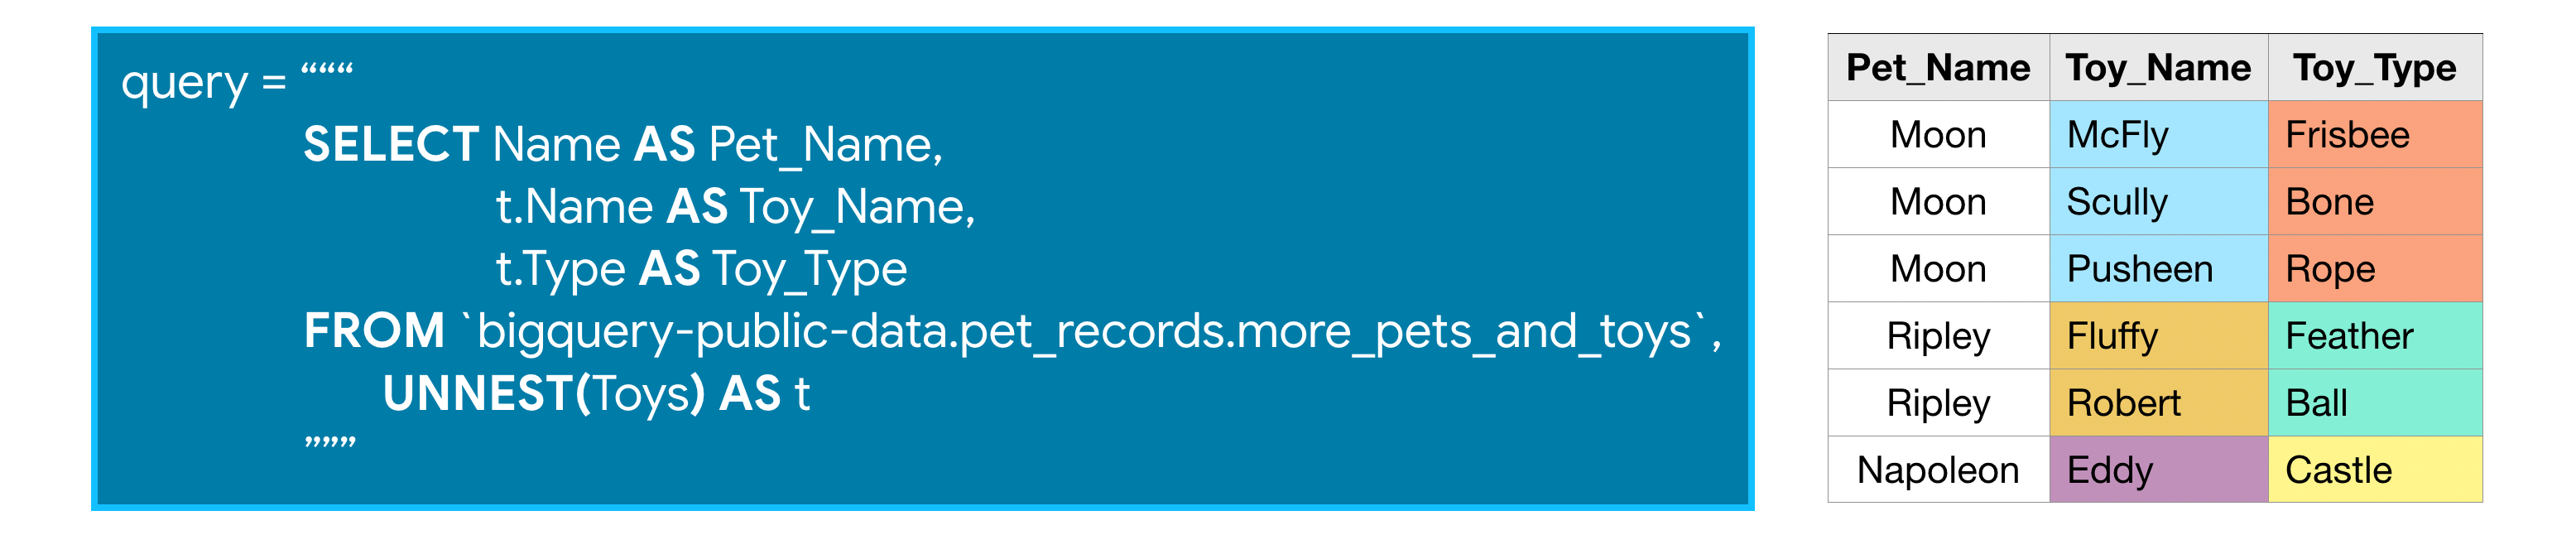

<p>Since the "Toys" column is repeated, we flatten it with the <strong>UNNEST()</strong> function.  And, since we give the flattened column an alias of <code>t</code>, we can refer to the "Name" and "Type" fields in the "Toys" column as <code>t.Name</code> and <code>t.Type</code>, respectively.</p>

# Writing Efficient Queries

Most database systems have a <strong>query optimizer</strong> that attempts to interpret/execute your query in the most effective way possible. But several strategies can still yield huge savings in many cases.

Some useful functions  to compare the efficiency of different queries:
<ul>
<li><code>show_amount_of_data_scanned()</code> shows the amount of data the query uses.</li>
<li><code>show_time_to_run()</code> prints how long it takes for the query to execute.</li>
</ul>


show_amount_of_data_scanned(str_query)

1) Only select the columns you want.
2) Read less data.
3) Avoid N:N JOINs.

# Resources

<ol>
<li><code>Oracle</code>:: <a href="https://livesql.oracle.com/apex/f?p=590:1000">livesql.oracle.com/apex</a></li>
<li><code>Oracle Apex Lab</code>:: <a href="https://apex.oracle.com/pls/apex/">livesql.oracle.com/apex</a></li>
<li><code>Towardsdatascience</code>:: <a href="https://towardsdatascience.com/ten-advanced-sql-concepts-you-should-know-for-data-science-interviews-4d7015ec74b0">Ten Advanced SQL Concepts You Should Know for Data Science Interviews</a></li>
    
<li><code>Udemy</code>:: <a href="https://tigeranalytics.udemy.com/course/the-complete-sql-bootcamp/">The Complete SQL Bootcamp 2022: Go from Zero to Hero</a></li>
<li><code>Udemy</code>:: <a href="https://tigeranalytics.udemy.com/course/sql-advanced/">Advanced SQL : SQL Expert Certification Preparation Course</a></li>
<li><code>Udemy</code>:: <a href="https://tigeranalytics.udemy.com/course/advanced-sql-mysql-for-analytics-business-intelligence/l">Advanced SQL: MySQL Data Analysis & Business Intelligence</a></li>
<li><code>Kaggle</code>:: <a href="https://www.kaggle.com/learn/advanced-sql">Advanced SQL</a></li>
<li><code>SQLzoo</code>:: <a href="https://sqlzoo.net/wiki/SQL_Tutorial">SQL Tutorial</a></li>
<li><code>TutorialsPoint</code>:: <a href="https://www.tutorialspoint.com/plsql/">PL/SQL Tutorial</a></li>
</ol>